In [85]:
import os
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import librosa
import librosa.display

import tensorflow as tf
from keras.models import load_model

import tensorflow as tf 
import keras.backend as K 
K.tensorflow_backend.set_session(tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))) 


In [2]:
env = os.environ

baseline_dir = env['DCASE_BASE']
work_dir     = env['MYWORK_BASE']

sys.path.append(baseline_dir)
sys.path.append(work_dir)

'/store/projects/ml/mathG/DCASE2017/baseline/DCASE2017-baseline-system/'

In [152]:
threshold = 0.5
dt = 30./1500.

def make_result_plot(wav, predicted, gt_df, prd_df, fig_title='sample', save_fig=False, filename='sample.png'):
#     feature_filename = baseline_dir + 'applications/system/task2/feature_extractor/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_57a55966f25a1b3722bd922a63c75875/sequence_mixture_devtest_babycry_000_c02f92b79f2bbefa98d008f3c2d9b704.cpickle'

#     gt_df = meta_gt_df[:1]
#     prd_df = meta_prd_df[meta_prd_df.filename == hh]

    # ======================================
#     wav = base_dir + gt_df['filename'][0]
    a, sr = librosa.load(wav)
    # mel spectrogram
    mel = librosa.feature.melspectrogram(y=a, sr=sr)
    mel_dB = librosa.power_to_db(mel, ref=np.max)

    # ===============================
    gt_flag_start = gt_df['onset']
    gt_flag_end   = gt_df['offset']

    # ===============================
#     result = ca.predict(feature_filename)
#     result = result[0]

    time_index = result.shape[0]
    left = np.array(range(time_index))*dt

    # ===============================

    plt.rcParams["font.size"] = 14
    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(411)
    disp = librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.title('Mel-frequency spectrogram')
    cbaxes = fig.add_axes([1, 0.735, 0.01, 0.17]) 
    cb   = plt.colorbar(format='%+2.0f dB', cax=cbaxes)

    ax2 = fig.add_subplot(412)
    plt.bar(left, predicted, width=dt)
    plt.plot([left[0], left[-1]],[0.5, 0.5], "red", linestyle='dashed') # normal way
    plt.xlim(left[0], left[-1])
    plt.ylim([0, 1])

    ax3 = fig.add_subplot(413)
    plt.tick_params(left=False)
    plt.yticks(color="None")
    plt.title('Predicted')

    for index, row in prd_df.iterrows():
        flag_start = row[1]
        flag_end   = row[2]    
        testx = [flag_start, flag_end, flag_end, flag_start]
        testy = [0,0,1,1]
        plt.xlim([0, 30])
        plt.ylim([0, 1])
        plt.fill(testx,testy,color="blue")


    ax4 = fig.add_subplot(414)
    plt.tick_params(left=False)
    plt.yticks(color="None")
    plt.title('Ground Truth')
    testx = [gt_flag_start, gt_flag_end, gt_flag_end, gt_flag_start]
    testy = [0,0,1,1]
    plt.xlim([0, 30])
    plt.ylim([0, 1])
    plt.fill(testx,testy,color="red")

    fig.tight_layout()

    #幅をax2と同じにする
    fig.canvas.draw()
    axpos1 = ax1.get_position() # 上の図の描画領域
    axpos2 = ax2.get_position() # 下の図の描画領域
    axpos3 = ax3.get_position() # 下の図の描画領域
    axpos4 = ax4.get_position() # 下の図の描画領域
    ax1.set_position([axpos1.x0, axpos1.y0, axpos1.width, axpos1.height])
    ax2.set_position([axpos1.x0, axpos2.y0, axpos1.width, axpos2.height])
    ax3.set_position([axpos1.x0, 0.40, axpos1.width, 0.03])
    ax4.set_position([axpos1.x0, 0.28, axpos1.width, 0.03])

    # fig.suptitle(fig_title, fontsize=22)

    if save_fig:
        plt.savefig(filename)
    else:
        plt.show()

    fig.suptitle(fig_title, fontsize=20)
    plt.close(fig)


In [98]:
from main.src.support.analyzer import CakirAnalyzer

# Cakir Table1. units 96 --> 'eval_[5aa3cfc96be6061a47013f0c05ffeb3b].yaml'
model_dir = work_dir + 'main/results/my_sample/learner/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_9138a38a27a1fe93ce9267c74b646c84/feature_normalizer_86c6764b339414c628793552d084ff29/feature_aggregator_baaf606d9ac1eaca43a6a24b599998a9/learner_35b914298a367b0dddb4dca085381e67/'
recog_dir = work_dir + 'main/results/my_sample/recognizer/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_9138a38a27a1fe93ce9267c74b646c84/feature_normalizer_86c6764b339414c628793552d084ff29/feature_aggregator_baaf606d9ac1eaca43a6a24b599998a9/learner_35b914298a367b0dddb4dca085381e67/recognizer_c5143b74ef67d78e7a154ca3808faf4b/'

# model_bc_fn = model_dir + 'model_fold1_babycry.model.hdf5'
model_bc_fn = model_dir + 'model_fold1_babycry'
model_gb_fn = model_dir + 'model_fold1_glassbreak'
model_gs_fn = model_dir + 'model_fold1_gunshot'

project_name= 'my_sample'
set_id = 'crnn'

ca = CakirAnalyzer(model_bc_fn, project_name, set_id)

/store/projects/ml/mathG/DCASE2017/baseline/DCASE2017-baseline-system/dcase_framework/files.py:379: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict.update(self, yaml.load(infile))


In [56]:
feature_filename = baseline_dir + 'applications/system/task2/feature_extractor/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_57a55966f25a1b3722bd922a63c75875/sequence_mixture_devtest_babycry_000_c02f92b79f2bbefa98d008f3c2d9b704.cpickle'
feature_filename = baseline_dir + 'applications/system/task2/feature_extractor/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_57a55966f25a1b3722bd922a63c75875/sequence_mixture_devtest_babycry_001_f33132b1ff9b5ff4270bc2a289e8287b.cpickle'



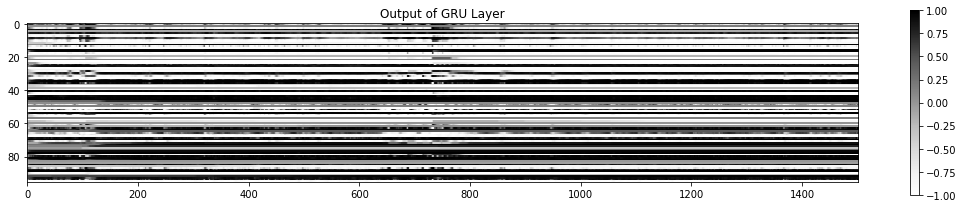

In [55]:
# GRU outputの描画
gru_out = ca.mid_output(feature_filename, 'gru_1')
gru_out = gru_out[0].T

fig = plt.figure(figsize=(15, 3))


plt.imshow(gru_out, aspect=3, cmap='Greys')
plt.colorbar()
plt.title('Output of GRU Layer')

fig.tight_layout()
plt.show()



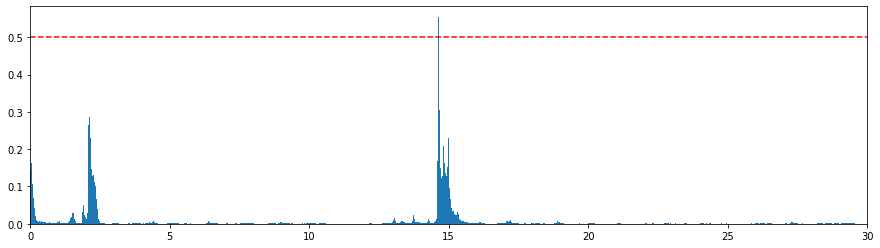

In [100]:
# predict の描画
result = ca.predict(feature_filename)
result = result[0]

threshold = 0.5

dt = 30./1500.
time_index = result.shape[0]
left = np.array(range(time_index))*dt

fig = plt.figure(figsize=(15, 4))
plt.bar(left,result, width=dt)
plt.plot([left[0], left[-1]],[0.5, 0.5], "red", linestyle='dashed') # normal way
plt.xlim(left[0], left[-1])
plt.show()



In [66]:
# predict x Ground Truth ...
# Evaluation
env = os.environ
work_dir     = env['MYWORK_BASE']

base_dir = work_dir + '/data/TUT-rare-sound-events-2017-development/'

### test
meta_babycry_prd = recog_dir + 'results_fold1_babycry.txt'
meta_babycry_gt  = base_dir + 'generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtest_babycry.csv'

col_names = ['filename', 'onset', 'offset', 'label']
meta_prd_df = pd.read_csv(meta_babycry_prd, sep='\t', header=None, names=col_names)
meta_gt_df  = pd.read_csv(meta_babycry_gt, sep='\t', header=None, names=col_names)


In [87]:

plot_basedir = '../../plots/predict_comparison/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/'
base_dir = work_dir + '/data/TUT-rare-sound-events-2017-development/'

# for key, df in dfs.items():
# #     wav = base_dir + val[]
#     plot_dir = plot_basedir + key + '/'
    
#     if not(os.path.exists(plot_dir)):
#         os.makedirs(plot_dir)
#     print(meta_prd_df.iterrows())
for index, row in meta_gt_df.iterrows():
    wav = base_dir + row[0]
    flag_start = row[1]
    flag_end   = row[2]
    
    print(row[0])
    # wave form data
    a, sr = librosa.load(wav)
    # mel spectrogram
    mel = librosa.feature.melspectrogram(y=a, sr=sr)
    mel_dB = librosa.power_to_db(mel, ref=np.max)

    # title 
#     title = key + str(index)
    # plot file name        
#     plot_finename = plot_dir + os.path.split(wav)[1].split('.')[0] + '.png'






generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/audio/mixture_devtest_babycry_000_c02f92b79f2bbefa98d008f3c2d9b704.wav
generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/audio/mixture_devtest_babycry_001_f33132b1ff9b5ff4270bc2a289e8287b.wav
generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/audio/mixture_devtest_babycry_002_04b75338e2ab48cbd85c666dd859a140.wav
generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/audio/mixture_devtest_babycry_003_9d3885eba392ebf059355c864e83908c.wav


KeyboardInterrupt: 

In [89]:
# GRU x predict
hh = 'generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/audio/mixture_devtest_babycry_000_c02f92b79f2bbefa98d008f3c2d9b704.wav'

nowdf = meta_prd_df[meta_prd_df.filename == hh]


#left[0]


/home/hirotoshi/.pyenv/versions/anaconda3-2019.10/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


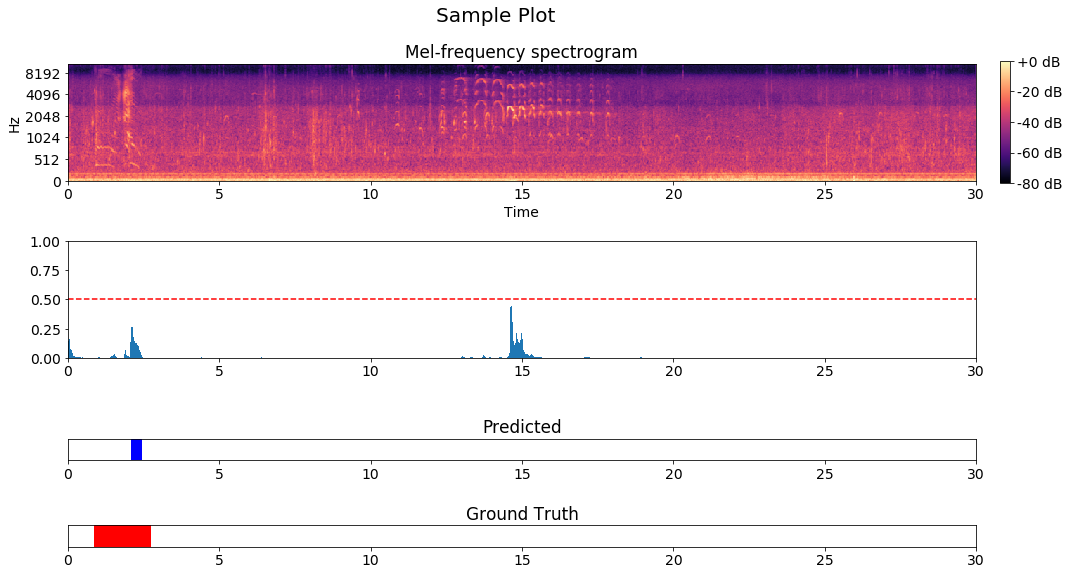

In [151]:
feature_filename = baseline_dir + 'applications/system/task2/feature_extractor/dataset_c17f65145b5c15a1a0afc148dc881423/feature_extractor_57a55966f25a1b3722bd922a63c75875/sequence_mixture_devtest_babycry_000_c02f92b79f2bbefa98d008f3c2d9b704.cpickle'

gt_df = meta_gt_df[:1]
prd_df = meta_prd_df[meta_prd_df.filename == hh]

# ======================================
wav = base_dir + gt_df['filename'][0]
a, sr = librosa.load(wav)
# mel spectrogram
mel = librosa.feature.melspectrogram(y=a, sr=sr)
mel_dB = librosa.power_to_db(mel, ref=np.max)

# ===============================
gt_flag_start = gt_df['onset']
gt_flag_end   = gt_df['offset']

# ===============================
result = ca.predict(feature_filename)
result = result[0]

threshold = 0.5

dt = 30./1500.
time_index = result.shape[0]
left = np.array(range(time_index))*dt

# ===============================

plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(411)
disp = librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr)
plt.title('Mel-frequency spectrogram')
cbaxes = fig.add_axes([1, 0.735, 0.01, 0.17]) 
cb   = plt.colorbar(format='%+2.0f dB', cax=cbaxes)
# cb   = plt.colorbar(format='%+2.0f dB')
                    
                    
ax2 = fig.add_subplot(412)
plt.bar(left,result, width=dt)
plt.plot([left[0], left[-1]],[0.5, 0.5], "red", linestyle='dashed') # normal way
plt.xlim(left[0], left[-1])
plt.ylim([0, 1])

ax3 = fig.add_subplot(413)
plt.tick_params(left=False)
plt.yticks(color="None")
plt.title('Predicted')

for index, row in prd_df.iterrows():
    flag_start = row[1]
    flag_end   = row[2]    
    testx = [flag_start, flag_end, flag_end, flag_start]
    testy = [0,0,1,1]
    plt.xlim([0, 30])
    plt.ylim([0, 1])
    plt.fill(testx,testy,color="blue")


ax4 = fig.add_subplot(414)
plt.tick_params(left=False)
plt.yticks(color="None")
plt.title('Ground Truth')
testx = [gt_flag_start, gt_flag_end, gt_flag_end, gt_flag_start]
testy = [0,0,1,1]
plt.xlim([0, 30])
plt.ylim([0, 1])
plt.fill(testx,testy,color="red")

fig.tight_layout()

#幅をax2と同じにする
fig.canvas.draw()
axpos1 = ax1.get_position() # 上の図の描画領域
axpos2 = ax2.get_position() # 下の図の描画領域
axpos3 = ax3.get_position() # 下の図の描画領域
axpos4 = ax4.get_position() # 下の図の描画領域
ax1.set_position([axpos1.x0, axpos1.y0-0.05, axpos1.width, axpos1.height])
ax2.set_position([axpos1.x0, axpos2.y0-0.05, axpos1.width, axpos2.height])
ax3.set_position([axpos1.x0, 0.35, axpos1.width, 0.03])
ax4.set_position([axpos1.x0, 0.23, axpos1.width, 0.03])

# fig.suptitle(fig_title, fontsize=22)
fig.suptitle('Sample Plot', fontsize=20)
plt.show()



